In [1]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
random_state=4
import pandas as pd
from Evaluation import synthsonic, writetodict, plotter, plot_oversampling, evaluate_oversamplers
import smote_variants as sv
from sklearn.tree import DecisionTreeClassifier

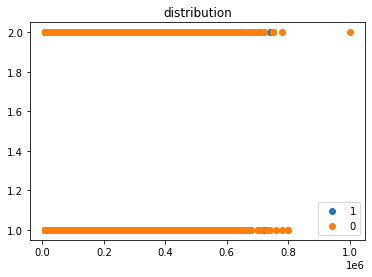

Counter({0: 23364, 1: 6636})


In [6]:
# loading datasets

path = "/Users/tristenmarto/Documents/Studie/Thesis/Synthsonic_data_analysis/Datasets/"
data = path+"credit_default.csv"

data = pd.read_csv(data, index_col=0)

plotter(data.iloc[:,:-1].values,data.iloc[:,-1].values, "distribution")


data_dict = writetodict(data, 'credit_default')
X,y,name = data_dict['data'],data_dict['target'],data_dict['name']

In [7]:
datasets = [data_dict]
oversamplers = [synthsonic, sv.NoSMOTE, sv.SMOTE, sv.NT_SMOTE, sv.SMOTE_D]
classifier = DecisionTreeClassifier(random_state=random_state)
random_state = random_state

In [8]:
results = evaluate_oversamplers(datasets, oversamplers, classifier, random_state)

2021-06-03 13:57:08,365:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC17D0AA160}")
2021-06-03 13:57:08,365:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC17D0AA160}")


('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC17D0AA160}")
minority class 1, min dataset (4414, 23)


Building tree: 100%|██████████| 231/231.0 [00:00<00:00, 717.49it/s]
Generating for node: 6: 100%|██████████| 23/23 [00:02<00:00, 10.67it/s] 
2021-06-03 13:57:29,437:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-06-03 13:57:29,437:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')


('NoSMOTE', '{}')


2021-06-03 13:57:29,766:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-03 13:57:29,766:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")


('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")


2021-06-03 13:57:30,380:INFO:NT_SMOTE: Running sampling via ('NT_SMOTE', "{'proportion': 1.0, 'n_jobs': 1, 'random_state': 4}")
2021-06-03 13:57:30,380:INFO:NT_SMOTE: Running sampling via ('NT_SMOTE', "{'proportion': 1.0, 'n_jobs': 1, 'random_state': 4}")


('NT_SMOTE', "{'proportion': 1.0, 'n_jobs': 1, 'random_state': 4}")


2021-06-03 13:57:31,059:INFO:SMOTE_D: Running sampling via ('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'n_jobs': 1, 'random_state': 4}")
2021-06-03 13:57:31,059:INFO:SMOTE_D: Running sampling via ('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'n_jobs': 1, 'random_state': 4}")


('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'n_jobs': 1, 'random_state': 4}")


In [9]:
resultdf = pd.DataFrame(results)
resultdf

,dataset,sampler,clf_score,recall,roc_auc_score,f1_score,brier_score_loss,runtime
0,credit_default,synthsonic,0.728586,0.409991,0.615412,0.404081,0.271490,20.551348
1,credit_default,NoSMOTE,0.716162,0.395140,0.602348,0.384582,0.283763,0.003954
2,credit_default,SMOTE,0.724747,0.427993,0.619671,0.411065,0.275152,0.105720
3,credit_default,NT_SMOTE,0.726566,0.418092,0.616991,0.407010,0.273510,0.181840
4,credit_default,SMOTE_D,0.722424,0.414491,0.613403,0.401307,0.277500,0.181133
